In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import make_circles


#make 1000 examples
n_sample = 1000

x,y = make_circles(n_sample, noise=0.03, random_state=42)

In [ ]:
circle = pd.DataFrame({"X0":x[:,0], "X1":x[:,1], "label":y})

In [ ]:
import numpy as np


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

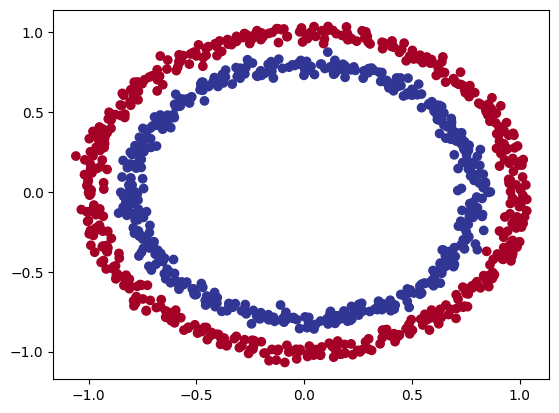

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([

    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),

])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history = model_5.fit(x_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8325
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.8288
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.8350
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8325
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8313
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8313
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8375
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8375
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.8375
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8413
Epoch 11/

In [ ]:
model_5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9950


[0.04651481658220291, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


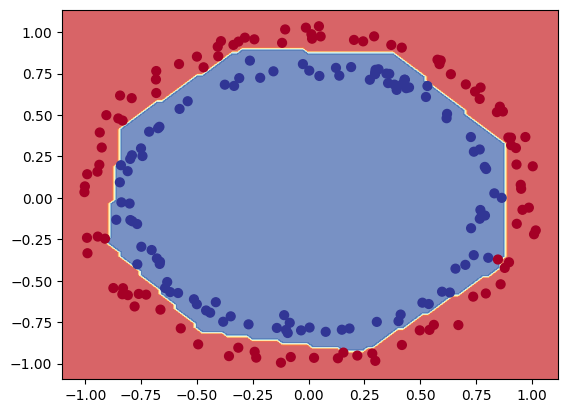

In [ ]:
plot_decision_boundary(model_5, x_test, y_test)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


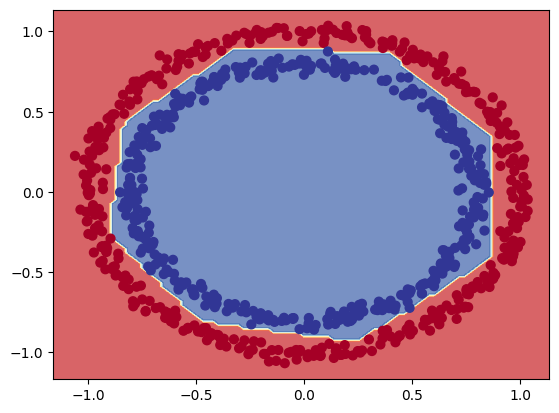

In [ ]:
plot_decision_boundary(model_5, x_train, y_train)

<Axes: >

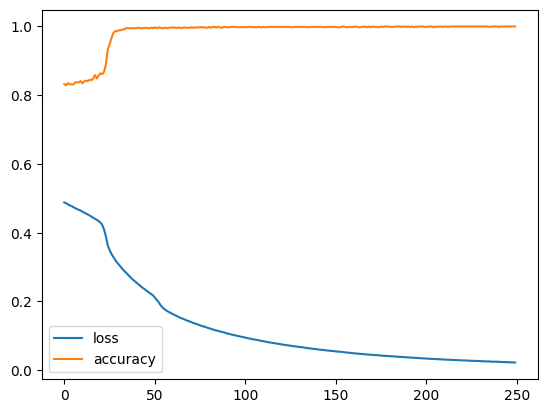

In [ ]:
pd.DataFrame(history.history).plot()

# Geting intuation of The relu and sigmoid activation functin

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
a